In [ ]:
# Capstone Two: Exploratory Data Analysis
#Goal: Explore the data relationships of all your features and understand how the features compare to the response variable. 
#●Build data profiles and tables 
## ○ Inferential statistics 
#● Explore data relationships 
## ○Data visualization 
#● Feature Selection and Engineering

In [2]:
# Import Required Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [13]:
# Specify the path to filtered dataset
dataset_path = "/Users/sangth/Desktop/USF_Springboard/Capstone_2/Dataset/santander-value-prediction-challenge/filtered_train.csv"
data_test = '/Users/sangth/Desktop/USF_Springboard/Capstone_2/Dataset/santander-value-prediction-challenge/test.csv'
data_train = '/Users/sangth/Desktop/USF_Springboard/Capstone_2/Dataset/santander-value-prediction-challenge/train.csv'
# Load the dataset into a DataFrame
df_train_filtered = pd.read_csv(dataset_path)
df_test = pd.read_csv(data_test)
# Verify that the data has been loaded correctly
df_train_filtered


,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,ff85154c8,1065000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,ffb6b3f4f,48000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,ffcf61eb6,2800000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,ffea67e98,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [14]:
print("Filtered set size: {}"  .format(df_train_filtered.shape))
print("Test set size: {}"  .format(df_test.shape))

Filtered set size: (4459, 4737)
Test set size: (49342, 4992)


#### Columns with constant values:

Generally when we get problems with many columns, there might be few columns with constant value in train set. So we can check that one as well.



In [29]:
unique_df = df_train_filtered.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1]
constant_df.shape

(0, 2)

In [31]:
str(constant_df.col_name.tolist())

'[]'

Perform Exploratory Data Analysis (EDA):

a. Data Profiles and Tables:

In [32]:
# Basic summary statistics for numeric columns
summary_stats = df_train_filtered.describe()
summary_stats

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


#### B. Inferential Statistis:

In [33]:
# Calculate Pearson's correlation coefficients
correlation = df_train_filtered.corr()['target']

# Display correlations sorted by absolute value
sorted_correlation = correlation.abs().sort_values(ascending=False)
print(sorted_correlation)


target       1.000000e+00
555f18bd3    2.733792e-01
9fd594eec    2.700188e-01
5bc7ab64f    2.678579e-01
cbbc9c431    2.650050e-01
                 ...     
105233ed9    1.474837e-05
8cd9be80e    1.125178e-05
a46587cda    9.532510e-06
3377a30e2    5.195102e-06
3a66c353a    6.839842e-07
Name: target, Length: 4736, dtype: float64


### Data Visualization

In [34]:
print(df_train_filtered.columns)

Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4737)


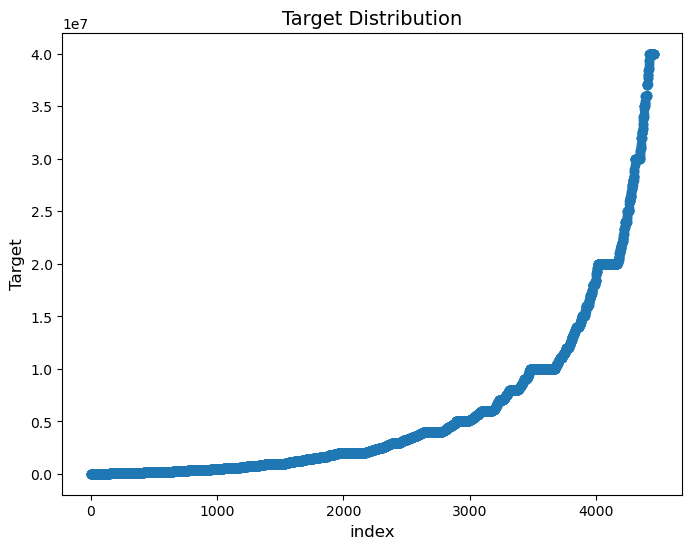

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train_filtered.shape[0]), np.sort(df_train_filtered['target'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Target Distribution", fontsize=14)
plt.show()

###### Looks like there are not any visible outliers in the data but the range is quite high.

###### We can now do a histogram plot of the target variable.

<Figure size 1200x800 with 0 Axes>

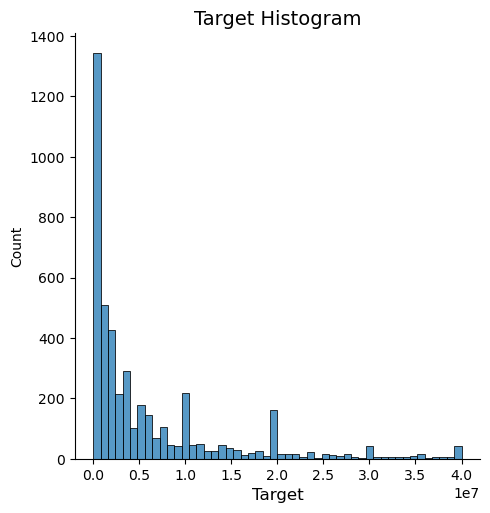

In [36]:
plt.figure(figsize=(12,8))
sns.displot(df_train_filtered["target"].values, bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Target Histogram", fontsize=14)
plt.show()

This is a right (Thanks to Wesam for pointing out my mistake) skewed distribution with majority of the data points having low value. Our competition admins are aware of this one and so they have chosen the evaluation metric as RMSLE (Root Mean Squared Logarithmic Error.).

So let us do a histogram plot on the log of target variables and recheck again.

<Figure size 1200x800 with 0 Axes>

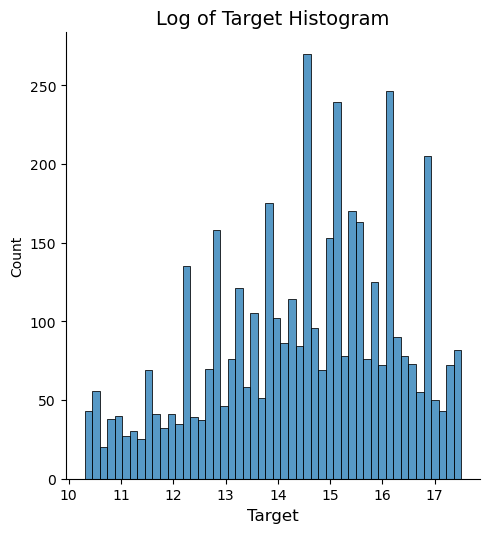

In [37]:
plt.figure(figsize=(12,8))
sns.displot(np.log1p(df_train_filtered["target"].values), bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Log of Target Histogram", fontsize=14)
plt.show()

### Correlation of features with target:

###### Now let us find the correlation of the variables with target and plot them.

###### Thanks to @Heads or Tails kernel and Tariq's comment, it might be a good idea to use Spearman correlation inplace of pearson since spearman is computed on ranks and so depicts monotonic relationships while pearson is on true values and depicts linear relationships.

###### There are thousands of variables and so plotting all of them will give us a cluttered plot. So let us take only those variables whose absolute spearman correlation coefficient is more than 0.1 (just to reduce the number of variables) and plot them.

In [38]:
from scipy.stats import spearmanr
import warnings

In [39]:
warnings.filterwarnings("ignore")

labels = []
values = []
for col in df_train_filtered.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(spearmanr(df_train_filtered[col].values, df_train_filtered["target"].values)[0])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

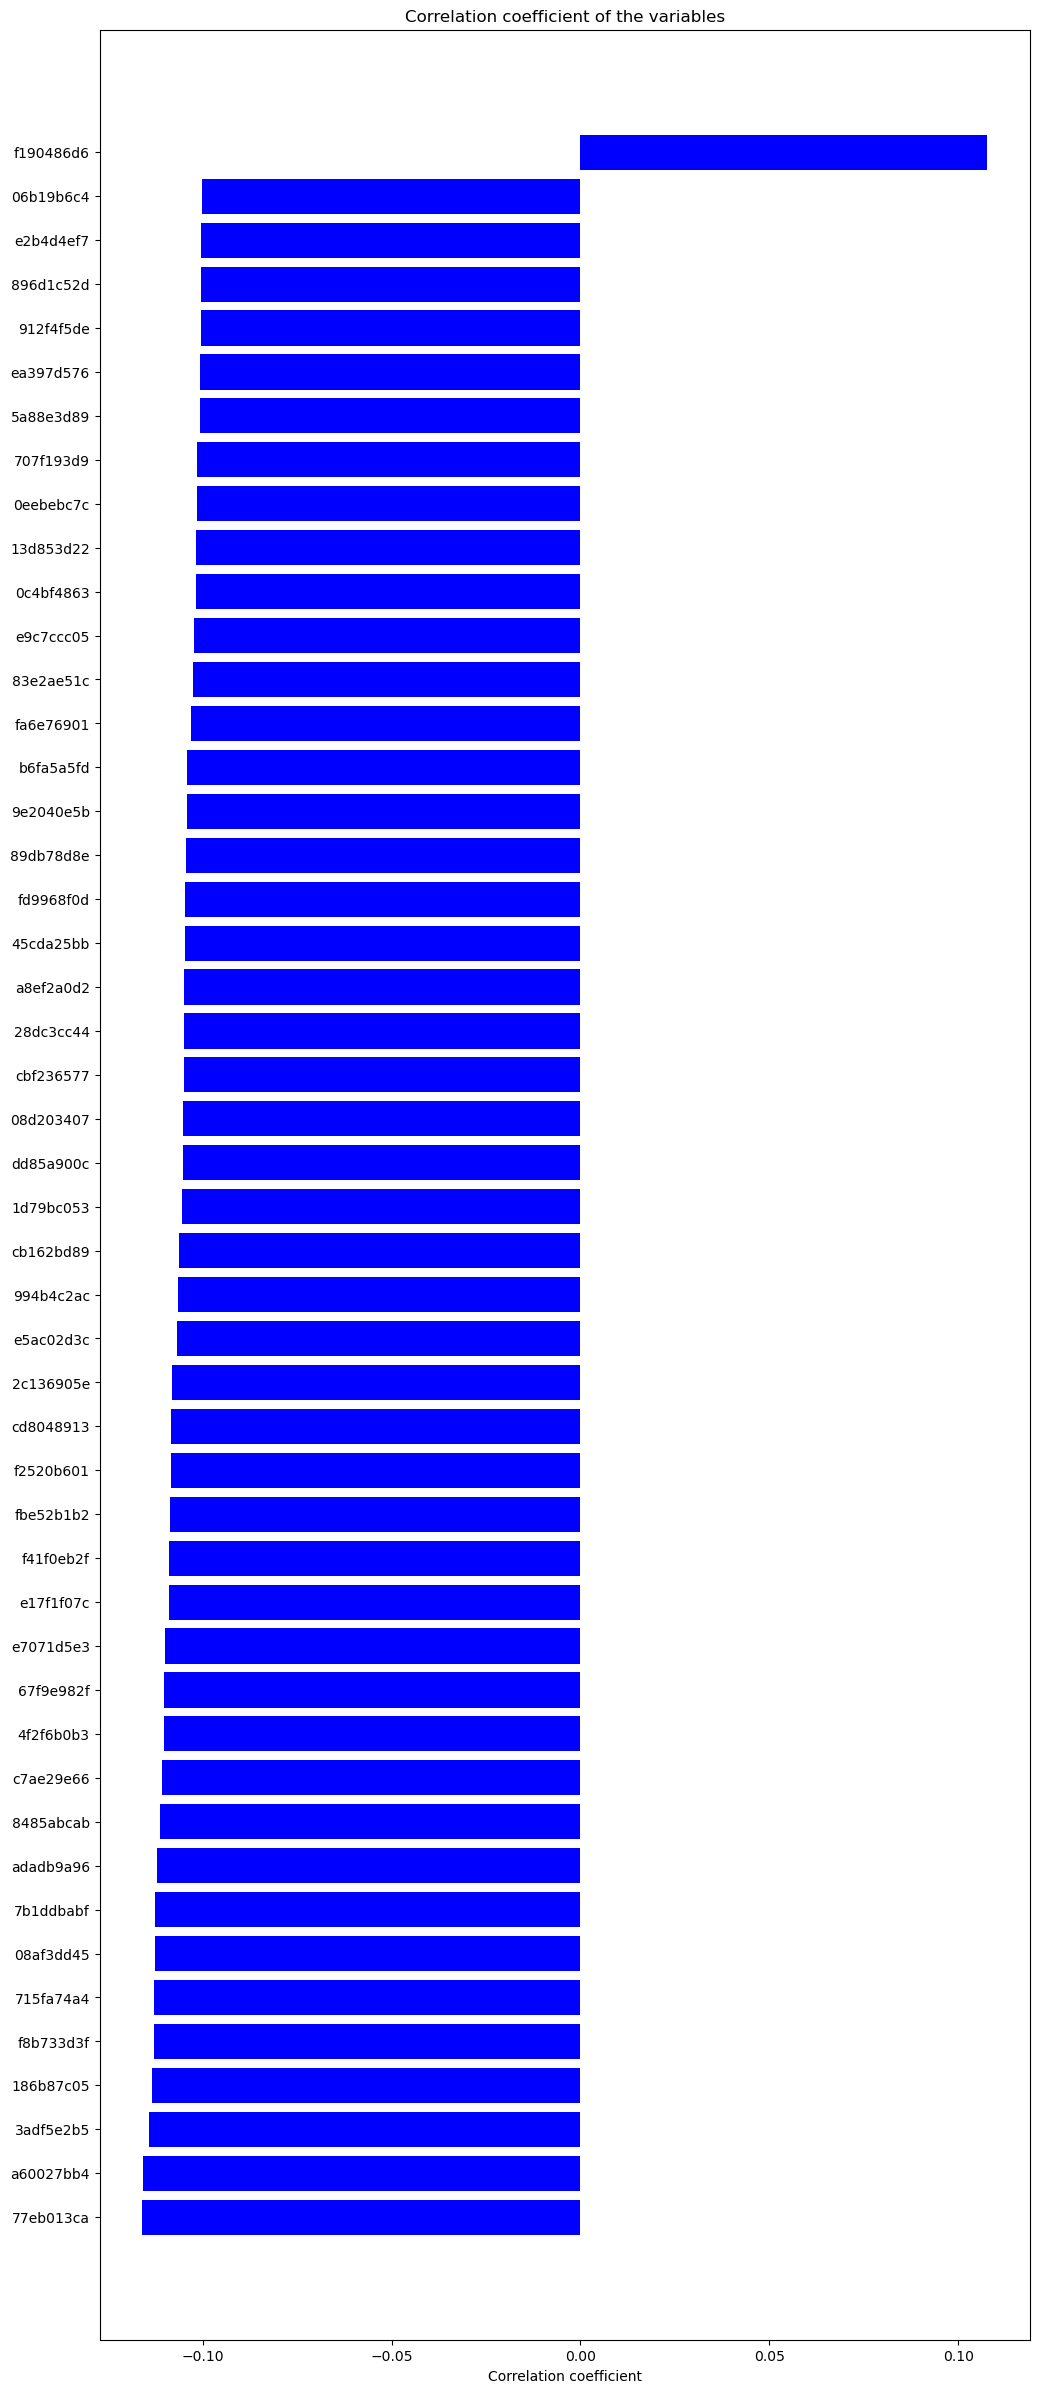

In [40]:
corr_df = corr_df = corr_df[(corr_df['corr_values']>0.1) | (corr_df['corr_values']<-0.1)]
ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

#### Corelation Heat Map

Now let us take these variables whose absolute value of correlation with the target is greater than 0.11 (just to reduce the number of features fuether) and do a correlation heat map.

This is just done to identify if there are any strong monotonic relationships between these important features. If the values are high, then probably we can choose to keep one of those variables in the model building process. Please note that we are doing this only for the very few features and feel free to add more features to explore more.

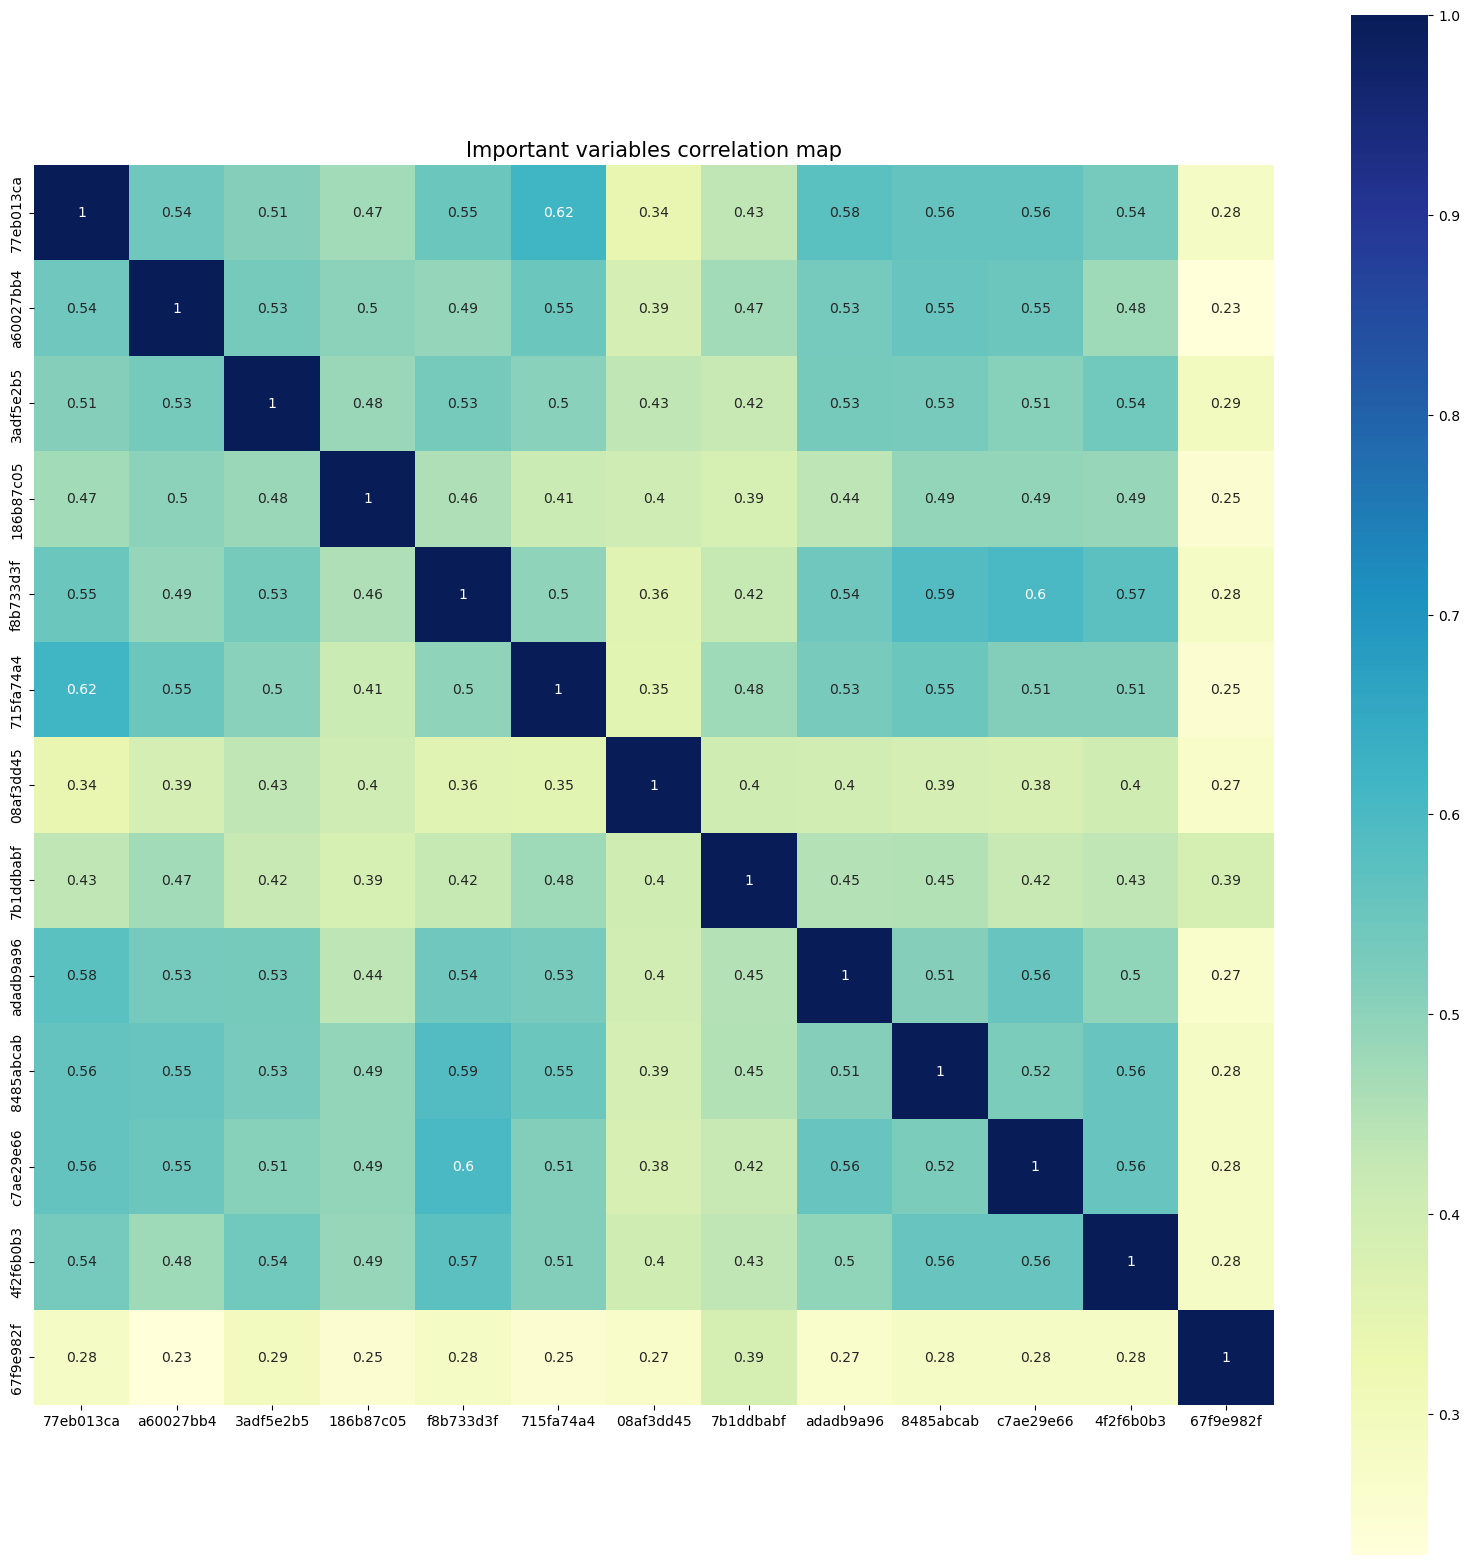

In [41]:
cols_to_use = corr_df[(corr_df['corr_values']>0.11) | (corr_df['corr_values']<-0.11)].col_labels.tolist()

temp_df = df_train_filtered[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap="YlGnBu", annot=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Seems like none of the selected variables have spearman correlation more than 0.7 with each other.

The above plots helped us in identifying the important individual variables which are correlated with target. However we generally build many non-linear models in Kaggle competitions. So let us build some non-linear models and get variable importance from them.

In this notebook, we will build two models to get the feature importances - Extra trees and Light GBM. It could also help us to see if the important features coming out from both of them are consistent. Let us first start with ET model.

#### Feature Importance - Extra trees model

Our Evaluation metric for the competition is RMSLE. So let us use log of the target variable to build our models. Also please note that we are removing those variables with constant values (that we identified earlier).

In [42]:
### Get the X and y variables for building model ###
train_X = df_train_filtered.drop(constant_df.col_name.tolist() + ["ID", "target"], axis=1)
test_X = df_test.drop(constant_df.col_name.tolist() + ["ID"], axis=1)
train_y = np.log1p(df_train_filtered["target"].values)

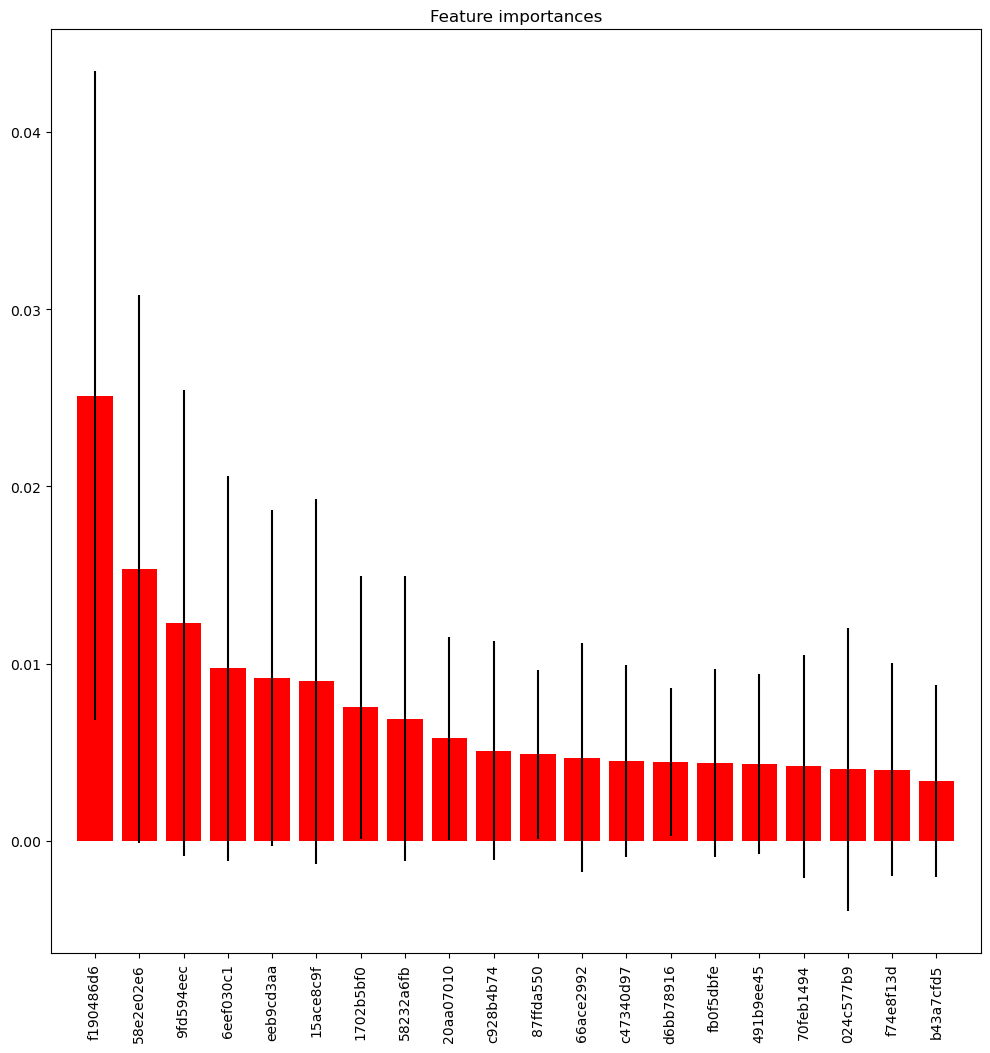

In [43]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_features=0.5, n_jobs=-1, random_state=0 )
model.fit(train_X, train_y)

## plot the importances ##
feat_names = train_X.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='r', yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

'f190486d6' seems to be the important variable followed by '58e2e02e6'.

In [44]:
df_train_filtered.head(5)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
